In [1]:
from pyiron_workflow_atomistics.gb.gb_cleavage import cleave_gb_structure
from ase.io import read
from tensorpotential.calculator import TPCalculator

from pyiron_workflow_atomistics.featurisers import distanceMatrixSiteFeaturiser, voronoiSiteFeaturiser
from pyiron_workflow_atomistics.gb.analysis import plot_GB_plane, find_GB_plane
from pyiron_workflow_atomistics.calculator import calculate_structure_node
import pyiron_workflow as pwf
from pyiron_workflow_atomistics.gb.dataclass_storage import CleaveGBStructureInput, PlotCleaveInput, FindGBPlaneInput, PlotGBPlaneInput, CalcStructureInput

import os
import numpy as np
%load_ext autoreload
%autoreload 2

2025-06-05 00:19:48.553708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-05 00:19:48.605177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-05 00:19:48.605315: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-05 00:19:48.690099: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-05 00:19:50.264081: W tensorflow/compiler/tf

In [2]:
@pwf.as_function_node
def update_dataclass(dataclass_instance, key, value):
    from dataclasses import replace, asdict

    if key not in asdict(dataclass_instance):
        raise KeyError(f"Field '{key}' not in dataclass {type(dataclass_instance).__name__}")

    updated_dataclass = replace(dataclass_instance, **{key: value})
    return updated_dataclass

      Step     Time          Energy          fmax
BFGS:    0 00:20:58     -292.948358        0.724844
BFGS:    1 00:20:58     -292.976988        0.559805
BFGS:    2 00:20:59     -293.050329        0.209810
BFGS:    3 00:20:59     -293.056559        0.212270
BFGS:    4 00:20:59     -293.075237        0.169150
BFGS:    5 00:20:59     -293.081559        0.130187
BFGS:    6 00:20:59     -293.085205        0.092621
BFGS:    7 00:20:59     -293.087372        0.113119
BFGS:    8 00:20:59     -293.090312        0.111341
BFGS:    9 00:20:59     -293.092193        0.060076
BFGS:   10 00:20:59     -293.093175        0.048174
BFGS:   11 00:20:59     -293.093874        0.053798
BFGS:   12 00:20:59     -293.094806        0.062899
BFGS:   13 00:20:59     -293.095797        0.053236
BFGS:   14 00:21:00     -293.096531        0.051929
BFGS:   15 00:21:00     -293.096973        0.040784
BFGS:   16 00:21:00     -293.097339        0.034666
BFGS:   17 00:21:00     -293.097712        0.036175
BFGS:   18 00:

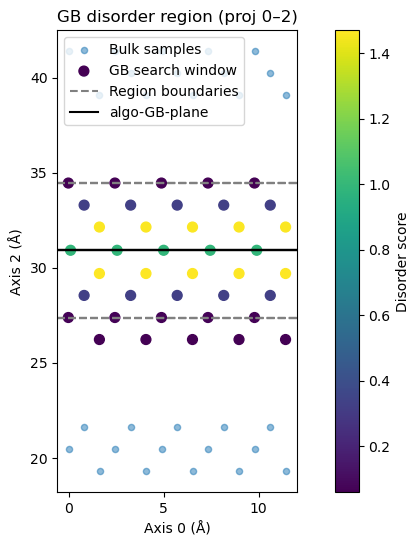

25.928913567810582 35.92891356781058
Site coordinate along axis 2: 30.928913567810582 (Å)
Unique layer positions: [10.073957607055977, 11.14276495757656, 12.352039179831735, 13.514079422504276, 14.679262723088197, 15.830872220966272, 16.988069979351202, 18.142684358197645, 19.298376131145922, 20.45332732532083, 21.608748373511684, 22.764616342239535, 23.919814069490418, 25.075176517656622, 26.231793619914438, 27.390602986878015, 28.552859978443234, 29.706221675501933, 30.928913567810582, 32.1516163062804, 33.30496090415714, 34.46708082793325, 35.625612413889186, 36.78183804326576, 37.936813686441916, 39.09177836587132, 40.24741777266541, 41.402038901139726, 42.5569818119993, 43.71107793699646, 44.86782801541199, 46.01916149401436, 47.18408512732632, 48.345574758269116, 49.554377338479085, 50.622912550310915]
Candidate cleavage positions: [10.608361282316269, 11.747402068704147, 12.933059301168004, 14.096671072796237, 15.255067472027235, 16.409471100158736, 17.565377168774425, 18.720530

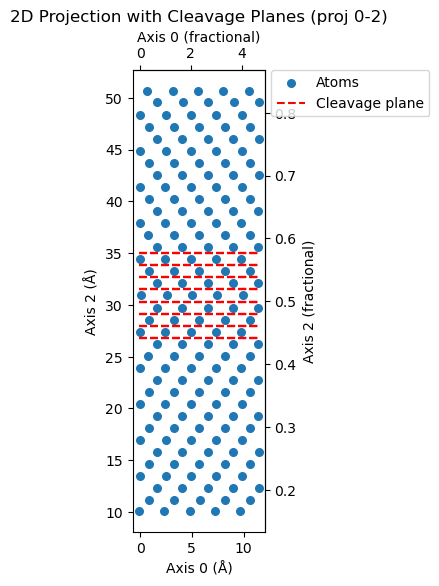

      Step     Time          Energy          fmax
BFGS:    0 00:21:03     -289.900460        0.498660
BFGS:    1 00:21:03     -289.913872        0.452723
BFGS:    2 00:21:03     -289.962628        0.222625
BFGS:    3 00:21:03     -289.965675        0.210166
BFGS:    4 00:21:03     -289.981592        0.093923
BFGS:    5 00:21:03     -289.982430        0.079906
BFGS:    6 00:21:03     -289.985377        0.047856
BFGS:    7 00:21:03     -289.985643        0.048427
BFGS:    8 00:21:04     -289.985937        0.045001
BFGS:    9 00:21:04     -289.986254        0.038487
BFGS:   10 00:21:04     -289.986566        0.029054
BFGS:   11 00:21:04     -289.986737        0.023187
BFGS:   12 00:21:04     -289.986848        0.021525
BFGS:   13 00:21:04     -289.986958        0.019762
BFGS:   14 00:21:04     -289.987065        0.022390
BFGS:   15 00:21:04     -289.987132        0.018903
BFGS:   16 00:21:04     -289.987175        0.015235
BFGS:   17 00:21:04     -289.987223        0.015423
BFGS:   18 00:

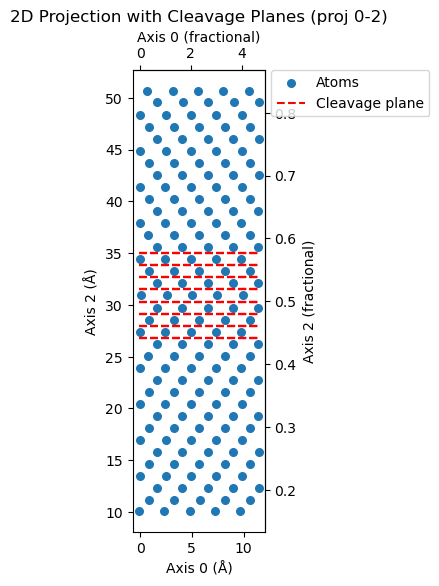

      Step     Time          Energy          fmax
BFGS:    0 00:21:35     -289.900460        0.498660
      Step     Time          Energy          fmax
BFGS:    0 00:21:35     -289.905962        0.503708
      Step     Time          Energy          fmax
BFGS:    0 00:21:35     -289.973060        0.611640
      Step     Time          Energy          fmax
BFGS:    0 00:21:35     -290.147726        0.711222
      Step     Time          Energy          fmax
BFGS:    0 00:21:35     -290.147757        0.711257
      Step     Time          Energy          fmax
BFGS:    0 00:21:35     -289.973155        0.611668
      Step     Time          Energy          fmax
BFGS:    0 00:21:35     -289.905982        0.503761
      Step     Time          Energy          fmax
BFGS:    0 00:21:35     -289.900364        0.499313
9.796091365535814 9.796091365535814
9.796091365535814 9.796091365535814
9.796091365535814 9.796091365535814
9.796091365535814 9.796091365535814
9.796091365535814 9.796091365535814
9.79

{'relax_GB__converged': True,
 'gb_plane_extractor_plot__fig': <Figure size 1000x600 with 2 Axes>,
 'gb_plane_extractor_plot__ax': <Axes: title={'center': 'GB disorder region (proj 0–2)'}, xlabel='Axis 0 (Å)', ylabel='Axis 2 (Å)'>,
 'calc_cleavage_rigid__cleaved_structure_list': [Atoms(symbols='Fe36', pbc=True, cell=[2.44925628, 3.99961876, 60.69585207619453]),
  Atoms(symbols='Fe36', pbc=True, cell=[2.44925628, 3.99961876, 60.69585207619453]),
  Atoms(symbols='Fe36', pbc=True, cell=[2.44925628, 3.99961876, 60.69585207619453]),
  Atoms(symbols='Fe36', pbc=True, cell=[2.44925628, 3.99961876, 60.69585207619453]),
  Atoms(symbols='Fe36', pbc=True, cell=[2.44925628, 3.99961876, 60.69585207619453]),
  Atoms(symbols='Fe36', pbc=True, cell=[2.44925628, 3.99961876, 60.69585207619453]),
  Atoms(symbols='Fe36', pbc=True, cell=[2.44925628, 3.99961876, 60.69585207619453]),
  Atoms(symbols='Fe36', pbc=True, cell=[2.44925628, 3.99961876, 60.69585207619453])],
 'calc_cleavage_rigid__cleaved_plane_coo

In [4]:
struct = read("asdf.vasp")

calc = TPCalculator("/root/github_dev/pyiron_workflow_atomistics_scratch/2025_04_29_FeGB_Segregation_Workflows/final_model/")
wf = pwf.Workflow("cleavage")

wf.relax_GB = calculate_structure_node(structure = struct,
                                        calc = calc,
                                        fmax = 0.01,
                                        max_steps = 10000,
                                        properties = ('energy', 'forces', 'stresses'),
                                        write_to_disk = False,
                                        output_dir = "gb_cleavage/GB_rel_vacuum",
                                        initial_struct_path = 'initial_structure.xyz',
                                        initial_results_path = 'initial_results.json',
                                        traj_struct_path = 'trajectory.xyz',
                                        traj_results_path = 'trajectory_results.json',
                                        final_struct_path = 'final_structure.xyz',
                                        final_results_path = 'final_results.json')

wf.gb_plane_extractor = find_GB_plane(atoms = wf.relax_GB.outputs.atoms,
                                        featuriser = voronoiSiteFeaturiser,
                                        axis = "c",
                                        approx_frac = 0.5,
                                        tolerance = 5.0,
                                        bulk_offset = 10.0,
                                        slab_thickness = 2.0,
                                        featuriser_kwargs = {},
                                        n_bulk = 10,
                                        threshold_frac = 0.1
                                      )
os.makedirs("gb_cleavage", exist_ok=True)
wf.gb_plane_extractor_plot = plot_GB_plane(atoms = wf.relax_GB.outputs.atoms,
                                            res = wf.gb_plane_extractor.outputs.gb_plane_analysis_dict,
                                            projection=(0, 2),
                                            reps=(5, 1),
                                            figsize=(10, 6),
                                            bulk_color='C0',
                                            window_cmap='viridis',
                                            plane_linestyles=('--', '-'),
                                            axis=2,
                                            dpi=300,
                                            save_path = f"gb_cleavage/pureGB_plane_identifier.jpg")



wf.updated_cleavage_input = update_dataclass(dataclass_instance = CleaveGBStructureInput(),
                                             key = "cleavage_target_coord",
                                             value = wf.gb_plane_extractor.outputs.gb_plane_analysis_dict["gb_cart"])

from pyiron_workflow_atomistics.gb.gb_cleavage import calc_cleavage_GB
wf.calc_cleavage_rigid = calc_cleavage_GB(structure=wf.relax_GB.outputs.atoms,
                                    calc=calc,
                                    energy = wf.relax_GB.outputs.results["energy"],
                                    parent_dir = "gb_cleavage",
                                    input_cleave_gb_structure = wf.updated_cleavage_input.outputs.updated_dataclass,
                                    input_plot_cleave = PlotCleaveInput(),
                                    input_calc_structure = CalcStructureInput().to_dict(),
                                    rigid=True)

wf.calc_cleavage_relax = calc_cleavage_GB(structure=wf.relax_GB.outputs.atoms,
                                    calc=calc,
                                    energy = wf.relax_GB.outputs.results["energy"],
                                    parent_dir = "gb_cleavage",
                                    input_cleave_gb_structure = wf.updated_cleavage_input.outputs.updated_dataclass,
                                    input_plot_cleave = PlotCleaveInput(),
                                    input_calc_structure = CalcStructureInput().to_dict(),
                                    rigid=False)
wf.run()